In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [37]:
liste_E = [500, 1000, 3000]
liste_nu = [0.35, 0.41, 0.45] #[0.35, 0.41, 0.45]
g=15

In [38]:
def lire_points_MPM(E,nu):
    nom_fich = "MPM-"  + "E" + str(int(E)) + "-nu" + "{:.2f}".format(nu) + "-g" + str(int(g))+ "_deux_cotes.res"
    f_MPM = open(nom_fich, "r")
    points_MPM_X = []
    points_MPM_Y = []
    lines_MPM = f_MPM.readlines()
    for line in lines_MPM:
        lu = line[:-1]
        liste_lue = lu.split(" ")
        points_MPM_X.append(float(liste_lue[0]))
        points_MPM_Y.append(float(liste_lue[1]))
    return points_MPM_X, points_MPM_Y

In [39]:
def lire_points_FEM(E,nu):
    nom_fich = "FEM-"  + "E" + str(int(E)) + "-nu" + "{:.2f}".format(nu) + "-g" + str(int(g))+ "_deux_cotes.res"
    f_FEM = open(nom_fich, "r")
    points_FEM_X = []
    points_FEM_Y = []
    lines_FEM = f_FEM.readlines()
    for line in lines_FEM:
        lu = line[:-1]
        liste_lue = lu.split(" ")
        points_FEM_X.append(float(liste_lue[0]))
        points_FEM_Y.append(float(liste_lue[1]))
    return points_FEM_X, points_FEM_Y

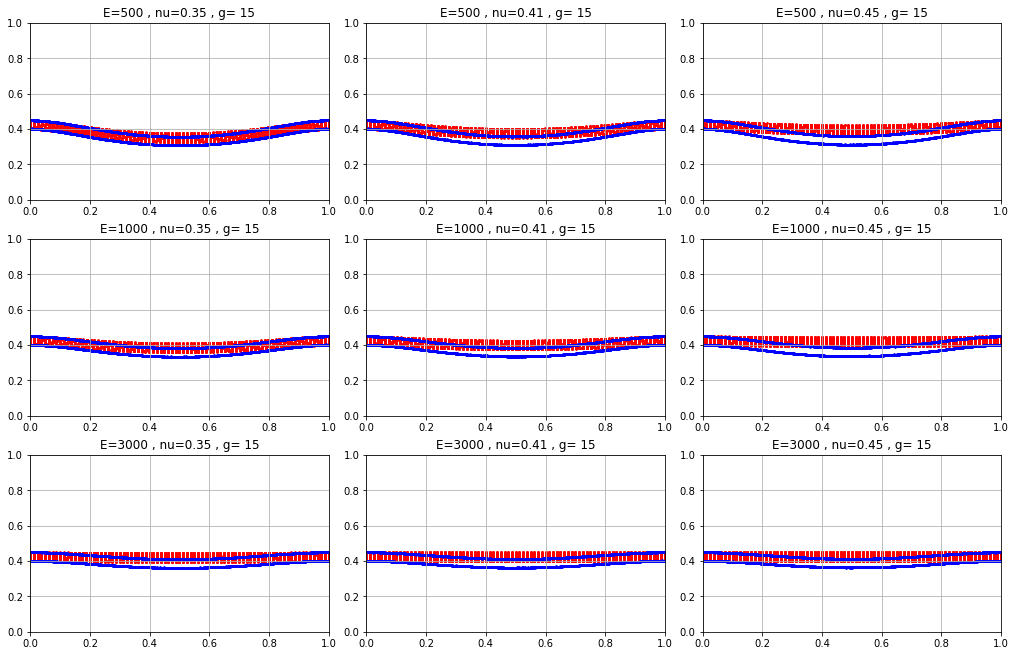

In [40]:
fig, ax = plt.subplots(len(liste_E),len(liste_nu),figsize=(14, len(liste_E)*3), layout='constrained', squeeze=False)
for i,E in enumerate(liste_E):
    for j,nu in enumerate(liste_nu):
        points_FEM_X, points_FEM_Y = lire_points_FEM(E,nu)
        ax[i,j].scatter(points_FEM_X, points_FEM_Y, color='red', s=3)         
        
        points_MPM_X, points_MPM_Y = lire_points_MPM(E,nu)
        ax[i,j].scatter(points_MPM_X, points_MPM_Y, color='blue', s=3)
        ax[i,j].grid()
            
        ax[i,j].set_xlim(0,1)
        ax[i,j].set_ylim(0,1)     
        ax[i,j].set_title("E=" + str(E) + " , " + "nu=" + "{:.2f}".format(nu) + " , g= " + str(g))